In [ ]:
# importar el dataset load_wine
from sklearn.datasets import load_wine
wine_dataset = load_wine()

In [ ]:
# Dividir el dataset en conjuntos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_dataset.data, wine_dataset.target, test_size=0.2, random_state=0)
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


Tamaño del conjunto de entrenamiento: 142
Tamaño del conjunto de prueba: 36


In [ ]:
# Aplicar tecnica de estandarizacion de nuestra eleccion
from sklearn.preprocessing import RobustScaler

# Aplicar RobustScaler al conjunto de entrenamiento
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar la misma transformación al conjunto de prueba
X_test_scaled = scaler.transform(X_test)

print(f"Tamaño del conjunto de entrenamiento escalado: {X_train_scaled.shape}")
print(f"Tamaño del conjunto de prueba escalado: {X_test_scaled.shape}")


Tamaño del conjunto de entrenamiento escalado: (142, 13)
Tamaño del conjunto de prueba escalado: (36, 13)


In [ ]:
# Crear una Multilayer Perceptron con 2 capas ocultas

from sklearn.neural_network import MLPClassifier

# Crear una MLP con dos capas ocultas
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=0)

# Entrenar el modelo con los datos escalados
mlp.fit(X_train_scaled, y_train)

# Evaluar el modelo
from sklearn.metrics import classification_report, accuracy_score

y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Precisión del modelo: 1.0


In [ ]:
# aplicar Grid search a esa base de datos con CV=5 considerando lo siguiente:
# Tres combinaciones diferentes en el número de neuronas de las capas escondidas,
# Tres opciones en las funciones de activación
# Tres opciones en los optimizadores a utilizar.
#Ademas desplegar el modelo que dio mejores resultados  y Poner en una variable el modelo que dio los mejores resultados

from sklearn.model_selection import GridSearchCV

# Definir los parámetros para el GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10, 5), (15, 8), (20, 10)],  # Tres combinaciones de neuronas
    'activation': ['relu', 'tanh', 'logistic'],  # Tres funciones de activación
    'solver': ['adam', 'sgd', 'lbfgs']  # Tres optimizadores
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con GridSearchCV usando los datos escalados
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_mlp = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred = best_mlp.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Precisión del mejor modelo: {accuracy_score(y_test, y_pred)}")

# Guardar el mejor modelo en una variable
best_model = best_mlp


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Precisión del mejor modelo: 1.0


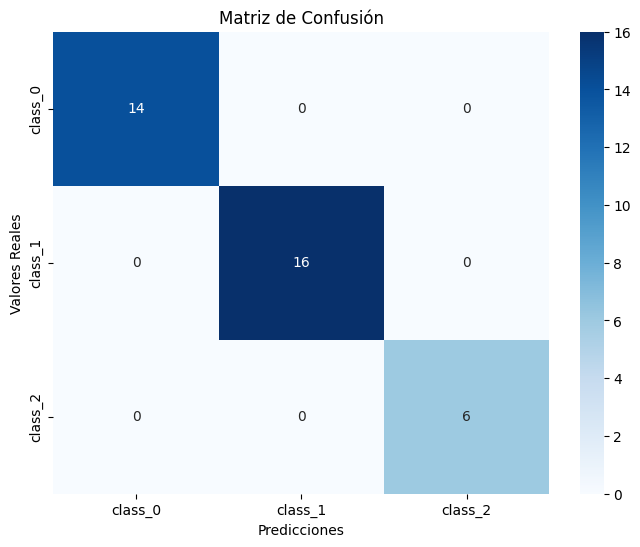

In [ ]:
# tomar la particion de Test y probar ese modelo desplegando en la Matriz de confusion los resultados

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=wine_dataset.target_names,
            yticklabels=wine_dataset.target_names)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
# desplegar un reporte de resultados de esta base de datos en base a todo lo anterior

# Imprimir un resumen de los resultados

print("Resumen de Resultados:")
print(f"Mejor modelo encontrado por GridSearchCV:\n{best_model}")
print(f"\nPrecisión del mejor modelo: {accuracy_score(y_test, y_pred)}")
print("\nMatriz de Confusión:")
print(cm) #Ya se muestra la matriz de confusión como un mapa de calor
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Resumen de Resultados:
Mejor modelo encontrado por GridSearchCV:
MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 10), max_iter=1000,
              random_state=0, solver='sgd')

Precisión del mejor modelo: 1.0

Matriz de Confusión:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Este experimento aplicado al conjunto de datos load_wine ha generado un modelo de red neuronal MLPClassifier altamente efectivo, ya que el mejor modelo obtenido a través de GridSearchCV logró una precisión perfecta 100% en el conjunto de prueba. La matriz de confusión muestra que cada categoría (0, 1 y 2) fue clasificada correctamente, sin ningún error, lo cual se refleja en los valores perfectos de precisión, recall y f1-score. Aunque obtener una precisión de 1.0 es muy alentador, es importante tener en cuenta que el conjunto de prueba era relativamente pequeño (36 muestras). Por ello, sería prudente validar el modelo con conjuntos de datos más amplios o mediante validación cruzada adicional para asegurar que el rendimiento se mantiene en escenarios más variados y evitar problemas de sobreajuste.



Interpretación de los Resultados y Utilidad


*   Separabilidad de las clases: Los resultados indican que las características empleadas para describir los vinos permiten distinguir de forma clara entre las diferentes clases. Esto es fundamental para aplicaciones en la industria, donde se requiere una categorización precisa de los productos.
*   Aplicaciones prácticas:

    Control de calidad: El modelo podría utilizarse para automatizar la verificación de la calidad y clasificación de vinos en bodegas y en procesos de producción.
    
    Optimización de procesos: Al identificar de forma exacta la categoría de cada vino, se pueden ajustar procesos de almacenamiento, distribución y comercialización.
    
    Soporte en investigación y marketing: Una clasificación fiable facilita estudios de mercado y análisis de características específicas que diferencian tipos de vino, ayudando a orientar estrategias comerciales y de posicionamiento



